In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

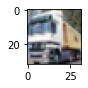

In [7]:
plt.figure(figsize=(5,1))
plt.imshow(X_train[1]) #truck

In [8]:
y_train[1]

array([9], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
classes[y_train[1][0]]

'truck'

In [11]:
X_train_flatten=X_train.reshape(len(X_train),32*32*3)
X_train_flatten.shape

(50000, 3072)

In [12]:
# Scaling

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [13]:
# One hot encoding of output

y_train_encoded = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])#loss= categorical_crossentropy becoz we are using encoded y_train
model.fit(X_train_scaled,y_train_encoded,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.8579 - accuracy: 0.3359
Epoch 2/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6555 - accuracy: 0.4141
Epoch 3/50
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5686 - accuracy: 0.4456
Epoch 4/50
1563/1563 [==============================] - 52s 34ms/step - loss: 1.5086 - accuracy: 0.4657
Epoch 5/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4573 - accuracy: 0.4857
Epoch 6/50
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4135 - accuracy: 0.5009
Epoch 7/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3728 - accuracy: 0.5160
Epoch 8/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.3417 - accuracy: 0.5272
Epoch 9/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.3066 - accuracy: 0.5412
Epoch 10/50
1563/1563 [==============================] - 53s 34m

In [15]:
# predict

y_pred = model.predict(X_test_scaled)

In [16]:
y_pred[1] #array of prob for each 10 classes

array([3.6686370e-07, 3.2477783e-05, 5.3804645e-09, 2.1343827e-10,
       5.0983961e-10, 4.9097520e-10, 8.0186153e-12, 1.8108476e-09,
       9.0971589e-04, 4.6692193e-03], dtype=float32)

In [17]:
np.argmax(y_pred[1]), y_test[1]

(9, array([8], dtype=uint8))

In [18]:
classes[np.argmax(y_pred[1])], classes[y_test[1][0]] #correct prediction

('truck', 'ship')

In [19]:
# evaluate model

y_test_encoded = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')
model.evaluate(X_test_scaled, y_test_encoded)

313/313 [==============================] - 4s 13ms/step - loss: 1.6961 - accuracy: 0.5455


[1.6960763931274414, 0.5454999804496765]